In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import signal



from scipy import signal
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

import pickle 
import matplotlib.colors

from sklearn.neighbors import KNeighborsRegressor

participants_dps_csv_data = pd.read_csv("/Users/cslinxs/Desktop/all_weeks/pwdb_model_configs.csv")

print(participants_dps_csv_data.get(" dbp [mmHg]")[4])

78.067


{'20': [[], []], '30': [[], []], '40': [[], []], '50': [[], []], '60': [[], []], '70': [[], []]}


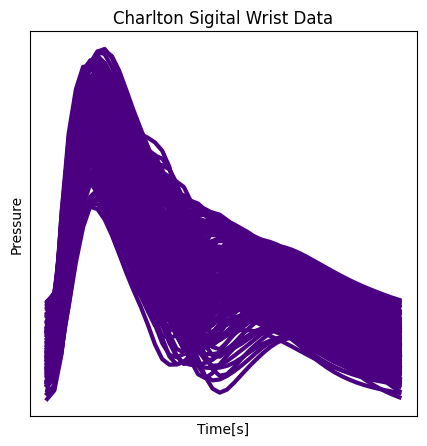

162


In [145]:
charlton_point_dbp = [[],[]]
plt.figure(figsize=(5, 5)) 
plt.rcParams['figure.figsize'] = [5, 5]




dict_people_ages = {}

for i in range(20,80,10):
    dict_people_ages[str(i)] = [[],[]]

print(dict_people_ages)

# will track age,dbp values
charlton_set_seen_duplicates =set()

Charlton_dataset_csv = "/Users/cslinxs/Desktop/all_weeks/Charlton_dataset_csv"
for files in os.listdir(Charlton_dataset_csv):
    if "_P.Csv" in files.title() and "Digital" in files.title():
        body_part = files.title().split("_")[1]
        function = files.title().split("_")[2]
        participants_csv_data = pd.read_csv(Charlton_dataset_csv+"/"+files)
        
        #plt.figure(figsize=(4, 5)) 
        for i in range(len(participants_csv_data)):
            resampled_y = signal.resample(participants_csv_data.iloc[i][1:].dropna(), 50)
            if True in list(np.isnan(resampled_y)):
                print("??",i)
                # There is a false
                
            else:
                indivuals_set = (participants_dps_csv_data.get(" age [years]")[i],participants_dps_csv_data.get(" dbp [mmHg]")[i],participants_dps_csv_data.get(" pvr [Pa s/m^3]")[i])
                if not(indivuals_set in charlton_set_seen_duplicates):
                    charlton_point_dbp[0].append(resampled_y)
                    charlton_point_dbp[1].append(participants_dps_csv_data.get(" dbp [mmHg]")[i])
                    plt.plot(resampled_y,linewidth=3.0, color="indigo" )
                    charlton_set_seen_duplicates.add(indivuals_set)
                    dict_people_ages[str((indivuals_set[0]//10)*10)][0].append(resampled_y)
                    dict_people_ages[str((indivuals_set[0]//10)*10)][1].append(participants_dps_csv_data.get(" dbp [mmHg]")[i])
        plt.title(f"Charlton Sigital Wrist Data")
        
        
        plt.xlabel("Time[s]")
        plt.ylabel("Pressure")
        plt.xticks([])
        plt.yticks([])
        plt.show()
print(len(charlton_set_seen_duplicates))


In [143]:
for i in dict_people_ages:
    print(len(dict_people_ages[i]))

27
27
27
27
27
27


In [157]:

participants_dps_csv_data = pd.read_csv("/Users/cslinxs/Desktop/all_weeks/pwdb_model_configs.csv")

# print(len(set(participants_dps_csv_data.get(" dbp [mmHg]"))))
# print(len(set(participants_dps_csv_data.get(" sv [ml]"))))

# print(len(set(participants_dps_csv_data.get(" pvr [Pa s/m^3]"))))

# for column in participants_dps_csv_data:
#     print(column, len(set(participants_dps_csv_data[column])))

In [158]:
print(len(all_points))

162


162


Text(79.455, 71.75425014351495, 'r2 -0.33')

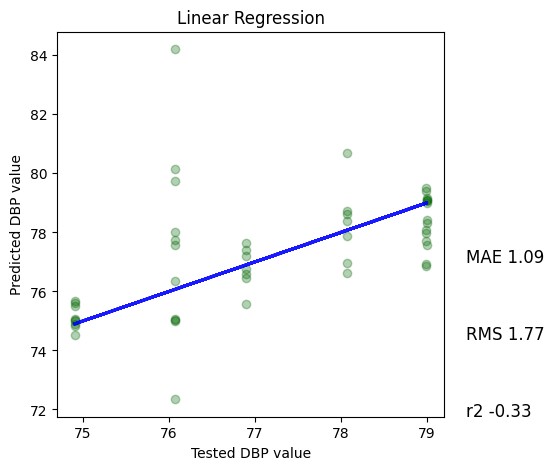

In [113]:
# single ones
plt.figure(figsize=(5, 5)) 
n_neighbors=1
#neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
neigh = LinearRegression()


all_points = np.array(charlton_point_dbp[0])
all_points = all_points.reshape(all_points.shape[0], -1)
print(len(all_points))
X_train, X_test, Y_train, Y_test = train_test_split(all_points, np.array(charlton_point_dbp[1]), test_size=0.3)


X_test = X_test.reshape(X_test.shape[0], -1)

 
the_fit= neigh.fit(X_train, Y_train)

y_predict= neigh.predict(X_test)


plt.rcParams.update({'font.size': 10})

plt.scatter(Y_test, y_predict,  color="darkgreen",  alpha=0.3 )
plt.plot(Y_test, Y_test, color="blue", linewidth=2, alpha=0.9)

plt.title(f"KNN")
plt.title(f"Linear Regression")



plt.xlabel("Tested DBP value")
plt.ylabel("Predicted DBP value")

xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmax+0.25, ymin+(ymax-ymin)*0.4,s=f"MAE {round(mean_absolute_error(Y_test, y_predict),2)}", fontsize=12)
plt.text(xmax+0.25, ymin+(ymax-ymin)*0.2, s= f"RMS {round(root_mean_squared_error(Y_test, y_predict),2)}", fontsize=12)
plt.text(xmax+0.25, ymin, s= f"r2 {round(r2_score(Y_test, y_predict),2)}", fontsize=12)


/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/3858254214.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_keys)
/var/folders/hp/g2knsnlj4y18ybnh9bjz7rkh0000gp/T/ipykernel_58862/3858254214.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(age_keys)


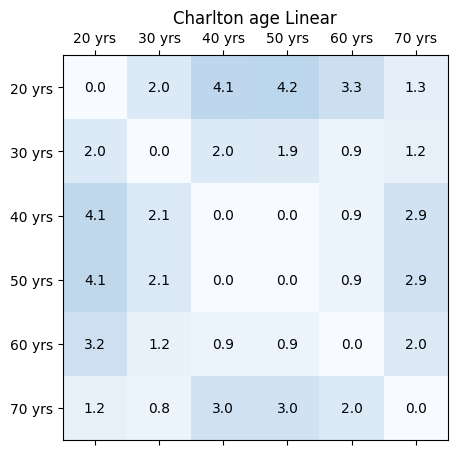

<Figure size 400x400 with 0 Axes>

In [170]:
# heat plots

# single ones
#neigh = KNeighborsRegressor(n_neighbors=1)


all_age_mae= []
maxi_mean = 0
for training_age in range(20,80,10):
    training_age = str(training_age)

    this_age_mae = []
    for testing_age in range(20,80,10):
        testing_age= str(testing_age)
        neigh = LinearRegression()
        
        #neigh = KNeighborsRegressor(n_neighbors=1)


        X = dict_people_ages[str(training_age)][0]
        Y = dict_people_ages[str(training_age)][1]

        X_other = dict_people_ages[str(testing_age)][0]
        Y_other = dict_people_ages[str(testing_age)][1]

        



        tests_size = int(len(Y)*0.3)

        X_test= np.array(X_other[:tests_size])
        Y_test= np.array(Y_other[:tests_size])

        X_test = X_test.reshape(X_test.shape[0], -1)
        Y_test = Y_test.reshape(Y_test.shape[0], -1)




        X_train =  np.array(X[tests_size:])
        Y_train= Y[tests_size:]


        X_train = X_train.reshape(X_train.shape[0], -1)



        the_fit= neigh.fit(X_train, Y_train)

        y_predict= neigh.predict(X_test)#, auscultatory_sbp[10])



        MAE = round(mean_absolute_error(Y_test, y_predict),2)


        #print(MAE)
        this_age_mae.append(MAE)

    if max(this_age_mae)>maxi_mean:
        maxi_mean= max(this_age_mae)
    all_age_mae.append(this_age_mae)








data = np.matrix(all_age_mae)

fig, ax = plt.subplots()
plt.figure(figsize=(4, 4)) 
cmap = matplotlib.colors.ListedColormap(['white','blue'])

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Blues', vmin=0, vmax=15)
age_keys = [str(num)+" yrs" for num in range(10,90,10)]
plt.rcParams.update({'font.size': 10})
ax.set_xticklabels(age_keys)
ax.set_yticklabels(age_keys)

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color = "black")
#bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3' )
ax.set_title("Charlton age Linear")
plt.show()


